In [67]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import fashion_mnist
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [68]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [69]:
print('Train: ', train_X.shape, train_Y.shape)
print('Test: ', test_X.shape, test_Y.shape)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground truth: 9')

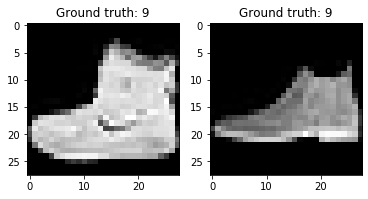

In [70]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)

print('Total number of outputs: ',  nClasses)
print('Output classes: ', classes )

plt.subplot(121)
plt.imshow(train_X[0, :, :], cmap='gray')
plt.title('Ground truth: {}'.format(train_Y[0]))


plt.subplot(122)
plt.imshow(test_X[0, :, :], cmap='gray')
plt.title('Ground truth: {}'.format(test_Y[0]))

In [71]:
train_X = train_X.reshape(-1 ,28, 28, 1)
test_X = test_X.reshape(-1 ,28, 28, 1)

train_X.shape, test_X.shape

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Original label: ', train_Y[0])
print('After conversion to one-hot: ', train_Y_one_hot[0])

Original label:  9
After conversion to one-hot:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [72]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [73]:
batch_size = 64
epochs = 20
num_classes = 10 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(num_classes, activation='softmax'))#Output


model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


#model.summary()

In [74]:
model_train = model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 92s 2ms/step - loss: 0.5481 - accuracy: 0.7970 - val_loss: 0.3614 - val_accuracy: 0.8703
Epoch 2/20
48000/48000 [==============================] - 112s 2ms/step - loss: 0.3578 - accuracy: 0.8675 - val_loss: 0.3015 - val_accuracy: 0.8895
Epoch 3/20
48000/48000 [==============================] - 76s 2ms/step - loss: 0.3071 - accuracy: 0.8850 - val_loss: 0.2687 - val_accuracy: 0.9010
Epoch 4/20
48000/48000 [==============================] - 76s 2ms/step - loss: 0.2798 - accuracy: 0.8965 - val_loss: 0.2563 - val_accuracy: 0.9057
Epoch 5/20
48000/48000 [==============================] - 75s 2ms/step - loss: 0.2621 - accuracy: 0.9021 - val_loss: 0.2486 - val_accuracy: 0.9093
Epoch 6/20
48000/48000 [==============================] - 78s 2ms/step - loss: 0.2475 - accuracy: 0.9070 - val_loss: 0.2432 - val_accuracy: 0.9100
Epoch 7/20
48000/48000 [==============================] - 85s 2ms/s

In [46]:
model.save("first_model.h5py")


In [47]:
# TEST
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])


10000/10000 [==============================] - 7s 681us/step
Test loss:  2.3080910102844236
Test accuracy:  0.10000000149011612


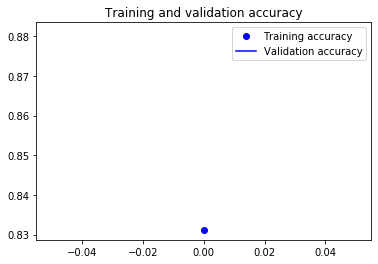

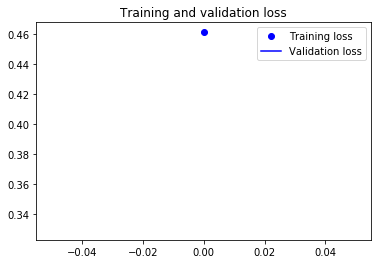

In [48]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 1000 correct labels


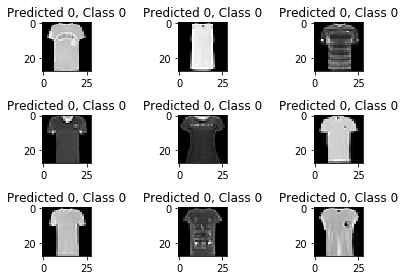

In [50]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" %len(correct))

for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 9000 incorrect labels


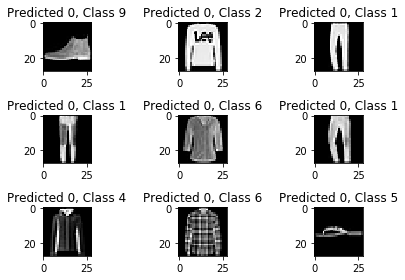

In [54]:
incorrect = np.where(predicted_classes!=test_Y)[0]

print("Found %d incorrect labels" % len(incorrect))

for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [56]:
# Classification Report 

from sklearn.metrics import classification_report, confusion_matrix

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.18      1000
     Class 1       0.00      0.00      0.00      1000
     Class 2       0.00      0.00      0.00      1000
     Class 3       0.00      0.00      0.00      1000
     Class 4       0.00      0.00      0.00      1000
     Class 5       0.00      0.00      0.00      1000
     Class 6       0.00      0.00      0.00      1000
     Class 7       0.00      0.00      0.00      1000
     Class 8       0.00      0.00      0.00      1000
     Class 9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/home/pdbanet/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


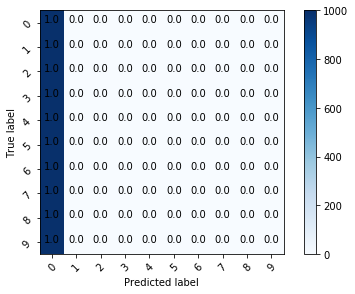

In [66]:
# Confusion matrix
import itertools
import os

#confusion_matrix(test_Y, predicted_classes)

cm = confusion_matrix(test_Y, predicted_classes)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

normalize = True

if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, float('%.3f'%(cm[i, j])),
             horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig(os.path.join(path_to_results, "confusion.png"))
plt.show()